In [115]:
import skimage as ski
from skimage.io import imread
import pylab as pl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

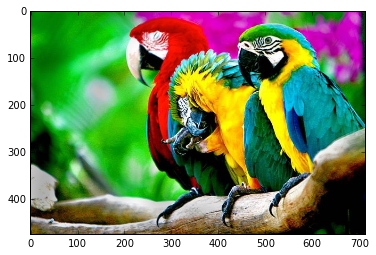

In [2]:
image = imread('parrots.jpg')
pl.imshow(image)
pl.show()

In [23]:
new_image = ski.img_as_float(image)

In [81]:
X = np.reshape(new_image.flatten(), (-1, 3))

In [101]:
cluster = KMeans( init='k-means++', random_state=241)
cluster.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=241, tol=0.0001,
    verbose=0)

In [130]:
print cluster.cluster_centers_
print cluster.labels_.shape

[[ 0.05602134  0.11828161  0.05239668]
 [ 0.45428194  0.66533662  0.44180048]
 [ 0.09658721  0.63583645  0.06872657]
 [ 0.95256162  0.82749191  0.04762044]
 [ 0.78797017  0.82374682  0.79607477]
 [ 0.05032106  0.54949125  0.59263746]
 [ 0.60945637  0.21508878  0.06793373]
 [ 0.77562373  0.09130156  0.68926568]]
(337962L,)


In [131]:
w, h, d = image.shape
change = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
    for j in range(h):
        change[i][j] = cluster.cluster_centers_[cluster.labels_[label_idx]]
        label_idx += 1

In [153]:

only_one = np.ones((w, h, d))
label_idx = 0
for i in range(w):
    for j in range(h):
        if cluster.labels_[label_idx] == 4:
            only_one[i][j] = cluster.cluster_centers_[cluster.labels_[label_idx]]
        label_idx += 1

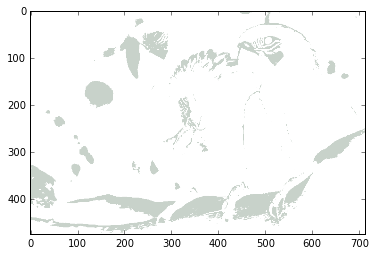

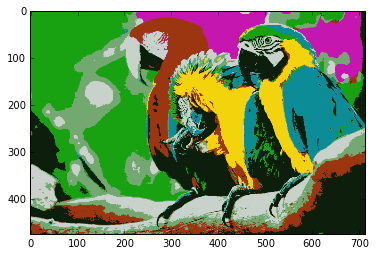

In [154]:
pl.imshow(only_one)
plt.show()
pl.imshow(change)
plt.show()

## Answer

In [152]:
w, h, d = image.shape
change = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
    for j in range(h):
        change[i][j] = cluster.cluster_centers_[cluster.labels_[label_idx]]
        label_idx += 1
mse = np.mean((new_image - change) ** 2)
psnr = 10 * np.log10(1.0 / mse)
print "mse: %.2f psnr: %.2f" % ( mse, psnr)

mse: 0.01 psnr: 18.48
